In [2]:
'''analise exploratoria é um método para reconhecer padrões nos dados, anomalias conseguir gerar uma boa descrição do 
que acontece com o conjunto
'''

#Univariate analysys, determina analise de uma featurem ou coluna, buscando reconhecer padrões
#deteca-se dados categoricos(spam ou ñ spam), aqueles que colocam o registro em uma categoria espeifica e dados continuos

'''scatterplots, graficos de disperção são utilizados para fazer EDA (exploratory data analysys) em dados de
tipo continuo
'''

'''estaremos fazendo uma classificação multiclasses'''
import pandas as pd
from sklearn.datasets import load_iris #vamos agora importar uma base de dados 
import seaborn as sns

data = load_iris()
df = pd.DataFrame(data = data['data'], columns = data['feature_names'])
df['target'] = data['target']#adicionando uma nova coluna com o rotulo 

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
'''alterando os valores da coluna target numericos para nomes'''
mapeamento = {0:'setosa', 1: 'versicolor', 2: 'virginica'}

df['target'] = df['target'].map(mapeamento)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


'note que temos 3 classes que no grafico de disperção ficam razoavelmente bem separadas'

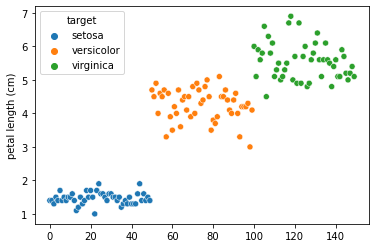

In [4]:
#UNIVARIATE ANALYSIS PARA DADOS CONTINUOS

'''a partir do conjunto de dados iremos fazer um grafico de disperção com dois eixos 
o eixo x sera o indice com os registros e o eixo y sera o tamanho da petala 
'''

x_axis = df.index
y_axis = df['petal length (cm)']

"sera passada como parametro para o grafico de disperção a categoria, classe do registro, tipo da planta"
sns.scatterplot(x= x_axis, y = y_axis, hue = df['target'])

'''note que temos 3 classes que no grafico de disperção ficam razoavelmente bem separadas'''

<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

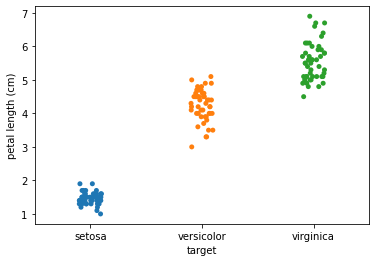

In [5]:
'''outra forma de fazer a univariate analysys é através da stripplot ou grafico de pontos'''

sns.stripplot(x= df['target'], y = df['petal length (cm)'])

C:\Users\Henrique\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal length (cm)', ylabel='Density'>

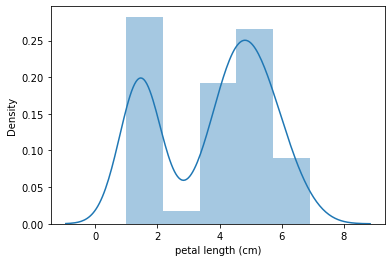

In [38]:
'''outra forma de representação é a partir de um grafico de distribuiçao para uma perspectiva mais generalizada a respeito dos
dados
'''

sns.distplot(df['petal length (cm)'])
'''observando a distribuição vemos que entre 4 e 6 cm a distribuição e mais densa, a curva é mais elevada
portanto essa é a região que mais tem plantas
'''

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

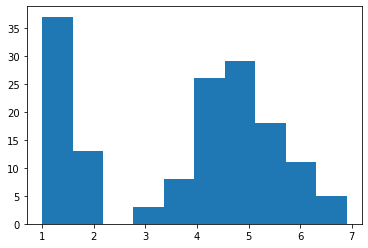

In [42]:
"histogramas : usados para indicar a frequencia que um determinado fenomeno ocorreu"
import matplotlib.pyplot as plt

plt.hist(df['petal length (cm)'])

'''olhando para o grafico vemos que entre 1 e 2 cm ha muitas plantas'''

<AxesSubplot:xlabel='petal length (cm)'>

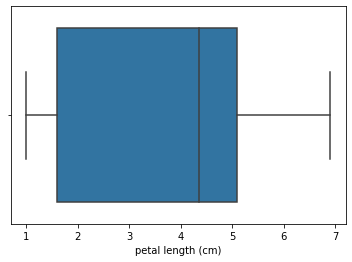

In [43]:
'''boxplot, apresenta o valor minimo o maximo e os quartis do conjunto de dados '''

sns.boxplot(x = df['petal length (cm)'])

'''no caso vemos que o minimo valor fica proximo de 1 o maximo proximo de 7 o primeiro quartil fica proximo a 2
o segundo , a metade proximo de 4 e o terceiro proximo de 5
'''

<AxesSubplot:xlabel='target', ylabel='count'>

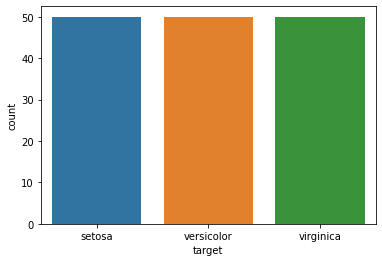

In [6]:
#analise univariada para variaveis categoricas, discretas

'''metodo CountPlot, apresenta a contagem feita a partir de cada classe ou seja quantos elementos de cada tipo existem
no grupo
'''

sns.countplot(x=df['target']) #automaticamente no eixo y ja ha uma contagem, o eixo x define apenas o criterio

([<matplotlib.patches.Wedge at 0x15c6bcc0910>,
 [Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-1.0999999999999954, -1.0298943258065002e-07, ''),
  Text(0.5500001486524352, -0.9526278583383436, '')])

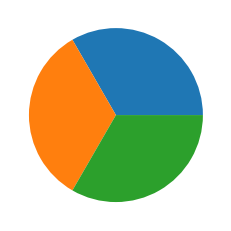

In [11]:
import matplotlib.pyplot as plt

'''grafico de pizza, apresenta a partir da categoria a distribuição/quantidade de elementos que pertencem 
a cada classe/categoria, é utilizada a biblioteca matplotlib
'''
contagem_por_tipo = df['target'].value_counts()

plt.pie(contagem_por_tipo)# nesse caso o grafico de pizza feito esta sem rótulo


([<matplotlib.patches.Wedge at 0x15c6becb190>,
 [Text(0.5499999702695115, 0.9526279613277875, 'iris'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'rosa'),
  Text(0.5500001486524352, -0.9526278583383436, 'copo-de-leite')])

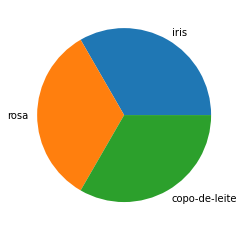

In [14]:
'''Para resolver a questão dos rotulos iremos indicar isso no codigo'''

labels = ['iris', 'rosa', 'copo-de-leite']

plt.pie(contagem_por_tipo, labels = labels)

In [18]:
#analise bivariada 

'''iniciaremos a analise utilizando mais de uma feature a partir de dados de tipo continuo-continuo'''
#importando o conjunto de dados
import seaborn as sns
titanic = sns.load_dataset('titanic')
'''diferentemente dos daods importados pela sklearn os dados importados pela seaborn ja vem com dataframe'''





,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Text(0.5, 1.0, 'bivariate analisys')

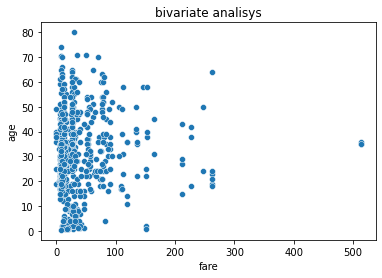

In [21]:
'''grafico de disperção(scatterplot)'''

sns.scatterplot(x=titanic['fare'], y=titanic['age'])
plt.title('bivariate analisys')

'a paritr do grafico veemos que as duas features , idade e tarifa paga, parecem não ter alguma relação, algum padrão especifico'

In [22]:
'''Para entenderse duas feature tem impacto/efeito uma sobre a outra é possivel usar a correlação'''

titanic[['fare', 'age']].corr() #as duas são independentes como vimos no grafico acima portanto a correlação deve ser bem baixa

,fare,age
fare,1.000000,0.096067
age,0.096067,1.000000


<AxesSubplot:>

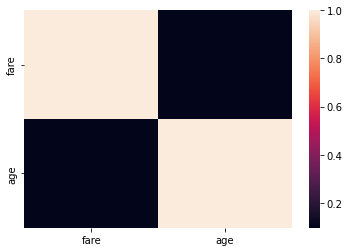

In [23]:
'''note que a correlação entre tarifa e tarifa assim como idade e idade é 1, ou seja 100%, contudo as demais correlações
são bem baixas, podemos entender da seguinte maneira, quando ha movimentos nos valores de um valor essa movimentação pouco
ou nada tem a ver com a movimetnação do outro
'''
#heat map(mapa de calor), para representar graficamente a correlação entre as features escolhidas a serem analisadas

sns.heatmap(titanic[['fare', 'age']].corr())

'''compreendendo o grafico, note que quanto mais claro maior a correlação entre as features e qunsto mais escuro menor
veja que taxa e idade 2 linha primeira coluna e 1 linha segunda coluna tem quadrantes bem escuros o que mostra que não ha
correlação entre as features
'''



In [24]:
#analise bivariada variaveis do tipo categorico-categorico

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
'''primeiro iremos determinar as features categoricas a serem utilizadas, no caso a classe do passageiro(pclass) e
se este sobreviveu ou não, note que ambas são categoricas, a partir destas tentaremos definir se houve relação entre
a classe que o passageiro estava e o fato deste ter sobrevivido ou não
'''

#nota ! valuecounts() variaveis cotinuas , groupby() variaveis categoricas

survived_ratio = titanic[['survived', 'pclass']].groupby('pclass').sum()
survived_ratio

,survived
pclass,
1,136
2,87
3,119


Text(0.5, 1.0, 'sobreviventes por classe')

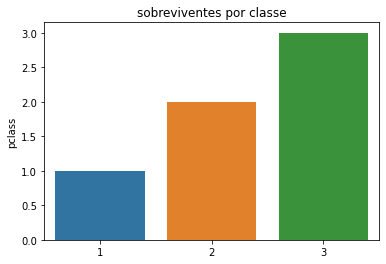

In [30]:
'''agora podemos representar graficamente o que esta aconetcendo atraves do grafico de barras'''

sns.barplot(x= ['1','2','3'] , y = survived_ratio.index )
plt.title("sobreviventes por classe")


([<matplotlib.patches.Wedge at 0x15c6d1e26d0>,
 [Text(0.34759742562046436, 1.043635966083014, '1'),
  Text(-1.086614775833759, -0.17107989051828945, '2'),
  Text(0.5056815692248013, -0.9768757088526373, '3')])

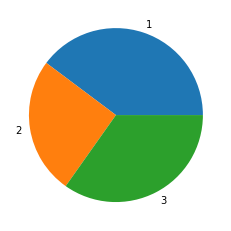

In [33]:
'''fazendo a representação por grafico de pizza para termos uma segunda noção, uma noção do total'''
plt.pie(survived_ratio['survived'], labels = survived_ratio.index)


<AxesSubplot:xlabel='survived', ylabel='age'>

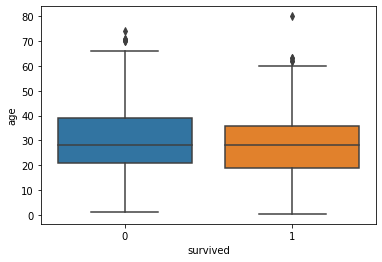

In [35]:
#analise bivariada variaveis continua-categorica

'''as features escolhidas serão idade(continua) e sobrevivencia(categorica)
para tal faremos um grafico boxplot
'''

sns.boxplot(x=titanic['survived'], y  =titanic['age'])

<AxesSubplot:xlabel='sex', ylabel='age'>

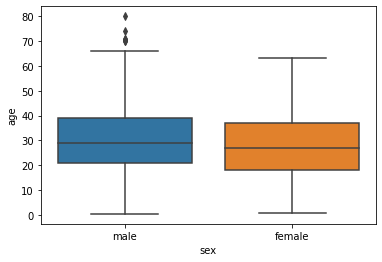

In [36]:
'''um segundo exemplo a partir de um box plot para determinanrmos os perfis dos passageiros , mais homens ou mulheres e a 
idade'''

sns.boxplot(x=titanic['sex'], y=titanic['age'])

In [39]:
#detectando outliers
import pandas as pd

x = pd.Series([1,2,3,6,7,8,150])
mean = x.mean()
std = x.std()
zscores = abs((x-mean)/std)

zscores

#serie que contem as anomalias removidas
#limiar escolhido foi 1.5
removed_outliers = x[zscores<=1.5]
removed_outliers

0    1
1    2
2    3
3    6
4    7
5    8
dtype: int64

In [11]:
'''uma segunda forma de lidar com outliers e substituindo os valores deste pelas medias ou medianas'''
import numpy as np #não é necessario importar numpy para determinar a mediana mas é uma possibilidade
import pandas as pd

x = pd.Series([1,2,3,6,7,8,150])
mean = x.mean()
std = x.std()
zscore = abs((x-mean)/std) # a partir da identificação da z score e sua comparação co um limiar atestamos se estamos ou não nos referindo a um outlier
median = x.median()

x[zscore>1.5] = median #para valores co z score maior que 1.5 havera a substituição do valor pela mediana

x

0    1
1    2
2    3
3    6
4    7
5    8
6    6
dtype: int64

In [16]:
#tranformação categorica de variaveis 

'''maquinas conseguem apenas lidar com valores numericos portanto pode ser que seja necessario alterar o tipo de uma 
feature categorica especifica para numeros 
'''

#1 forma label categoring 

bilionares = pd.read_csv(r'C:\Users\Henrique\Downloads\archive (1)\Billionaires Statistics Dataset.csv')
bilionares

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [25]:
#vamos fazer a mudança de tipo categorico gender (genero) primeiramente usando o replace

bilionares['gender'].replace({'M':0, 'F': 1}, inplace= True)

bilionares['gender']

0       0
1       0
2       0
3       0
4       0
       ..
2635    0
2636    0
2637    0
2638    0
2639    0
Name: gender, Length: 2640, dtype: int64

In [26]:
#susbtituindo por valores de frequencia 
'''no caso ao inves de categorizar o dado como 0 (homem), 1 (mulher), podemos colocar a frequencia em que cada um destes 
valore aparece como rótulo da feature
'''

freq = bilionares["gender"].value_counts()/len(bilionares['gender'])
freq

0    0.872348
1    0.127652
Name: gender, dtype: float64

In [31]:
bilionares['gender'].replace({0: freq[0], 1: freq[1]}, inplace = True)
bilionares

TypeError: 'NoneType' object is not subscriptable